In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00341/HAPT%20Data%20Set.zip

--2020-06-03 12:36:21--  https://archive.ics.uci.edu/ml/machine-learning-databases/00341/HAPT%20Data%20Set.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79596192 (76M) [application/x-httpd-php]
Saving to: ‘HAPT Data Set.zip’

HAPT Data Set.zip   100%[===================>]  75.91M  62.3MB/s    in 1.2s    

2020-06-03 12:36:22 (62.3 MB/s) - ‘HAPT Data Set.zip’ saved [79596192/79596192]



In [ ]:
!unzip HAPT\ Data\ Set

Archive:  HAPT Data Set.zip
  inflating: features_info.txt       
  inflating: README.txt              
  inflating: RawData/acc_exp01_user01.txt  
  inflating: RawData/acc_exp02_user01.txt  
  inflating: RawData/acc_exp03_user02.txt  
  inflating: RawData/acc_exp04_user02.txt  
  inflating: RawData/acc_exp05_user03.txt  
  inflating: RawData/acc_exp06_user03.txt  
  inflating: RawData/acc_exp07_user04.txt  
  inflating: RawData/acc_exp08_user04.txt  
  inflating: RawData/acc_exp09_user05.txt  
  inflating: RawData/acc_exp10_user05.txt  
  inflating: RawData/acc_exp11_user06.txt  
  inflating: RawData/acc_exp12_user06.txt  
  inflating: RawData/acc_exp13_user07.txt  
  inflating: RawData/acc_exp14_user07.txt  
  inflating: RawData/acc_exp15_user08.txt  
  inflating: RawData/acc_exp16_user08.txt  
  inflating: RawData/acc_exp17_user09.txt  
  inflating: RawData/acc_exp18_user09.txt  
  inflating: RawData/acc_exp19_user10.txt  
  inflating: RawData/acc_exp20_user10.txt  
  inflating: Raw

## Loading the Accelerometer and Gyroscope Data

In [ ]:
import pandas as pd
from scipy.spatial.distance import cosine
import numpy as np
from scipy.sparse import csr_matrix
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline

# display pandas results to 3 decimal points, not in scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
with open('features.txt') as handle:
    features = handle.readlines()
    features = map(lambda x: x.strip(), features)

with open('activity_labels.txt') as handle:
    activity_labels = handle.readlines()
    activity_labels = map(lambda x: x.strip(), activity_labels)

activity_df = pd.DataFrame(activity_labels)
activity_df = pd.DataFrame(activity_df[0].str.split(' ').tolist(),
                           columns = ['activity_id', 'activity_label'])
activity_df

,activity_id,activity_label
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING
6,7,STAND_TO_SIT
7,8,SIT_TO_STAND
8,9,SIT_TO_LIE
9,10,LIE_TO_SIT


In [ ]:
x_train = pd.read_table('Train/X_train.txt', header = None, sep = " ")
x_train.iloc[:10, :10].head()

,0,1,2,3,4,5,6,7,8,9
0,0.044,-0.006,-0.035,-0.995,-0.988,-0.937,-0.995,-0.989,-0.953,-0.795
1,0.039,-0.002,-0.029,-0.998,-0.983,-0.971,-0.999,-0.983,-0.974,-0.803
2,0.040,-0.005,-0.023,-0.995,-0.977,-0.985,-0.996,-0.976,-0.986,-0.798
3,0.040,-0.012,-0.029,-0.996,-0.989,-0.993,-0.997,-0.989,-0.993,-0.798
4,0.039,-0.002,-0.024,-0.998,-0.987,-0.993,-0.998,-0.986,-0.994,-0.802


In [ ]:
y_train = pd.read_table('Train/y_train.txt',
             header = None, sep = " ", names = ['activity_id'])
y_train.head()

,activity_id
0,5
1,5
2,5
3,5
4,5


In [ ]:
x_test = pd.read_table('Test/X_test.txt',
             header = None, sep = " ")
y_test = pd.read_table('Test/y_test.txt',
             header = None, sep = " ", names = ['activity_id'])

## Building a Human Activity Classifier

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import validation_curve, GridSearchCV

C_params = np.logspace(-6, 3, 10)
clf_svc = LinearSVC(random_state = 12)

train_scores, test_scores = validation_curve(
    clf_svc, x_train.values, y_train.values.flatten(),
    param_name = "C", param_range = C_params,
    cv = 5, scoring = "accuracy", n_jobs = -1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


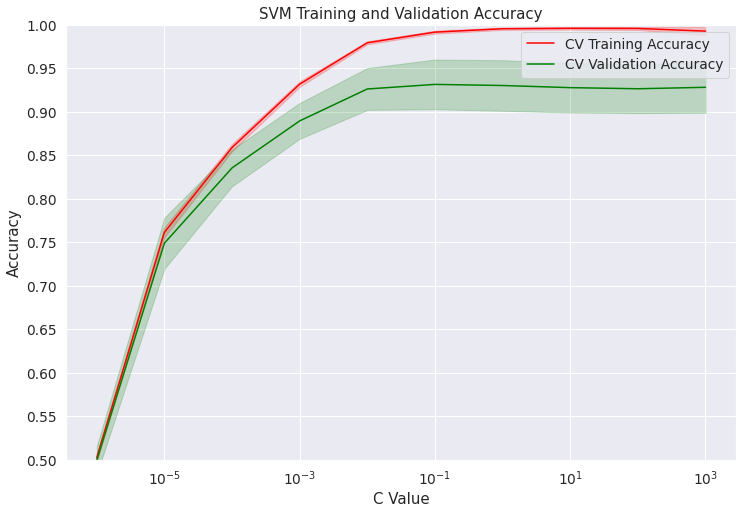

In [ ]:
import seaborn as sns

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

y_min = 0.5
y_max = 1.0

sns.set(font_scale = 1.25)
sns.set_style("darkgrid")
f = plt.figure(figsize = (12, 8))
ax = plt.axes()
plt.title("SVM Training and Validation Accuracy")
plt.xlabel("C Value")
plt.ylabel("Accuracy")
plt.ylim(y_min, y_max)
plt.yticks(np.arange(y_min, y_max + .01, .05))
plt.semilogx(C_params, train_scores_mean, label = "CV Training Accuracy", color = "red")
plt.fill_between(C_params, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha = 0.2, color = "red")
plt.semilogx(C_params, test_scores_mean, label = "CV Validation Accuracy",
             color = "green")
plt.fill_between(C_params, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha = 0.2, color = "green")
plt.legend(loc = "best")
plt.show()

In [ ]:
from sklearn.svm import SVC

Cs = np.logspace(-6, 3, 10)
parameters = [{'kernel': ['rbf'], 'C': Cs},
              {'kernel': ['linear'], 'C': Cs}]

svc = SVC(random_state = 12)

clf = GridSearchCV(estimator = svc, param_grid = parameters, cv = 5, n_jobs = -1)
clf.fit(x_train.values, y_train.values.flatten())

print(clf.best_params_)
print(clf.best_score_)

{'C': 100.0, 'kernel': 'rbf'}
0.9380786637064809


In [ ]:
clf.score(x_test, y_test)

0.9535104364326376

## Evaluating the Model

In [ ]:
y_test.activity_id.value_counts().values[0] / y_test.activity_id.value_counts().values.sum()

0.17583807716635041

In [ ]:
crosstab = pd.crosstab(y_test.values.flatten(), clf.predict(x_test),
                          rownames=['True'], colnames=['Predicted'],
                          margins=True)
crosstab

Predicted,1,2,3,4,5,6,7,8,9,10,11,12,All
True,,,,,,,,,,,,,
1,491,3,2,0,0,0,0,0,0,0,0,0,496
2,15,455,0,0,0,0,1,0,0,0,0,0,471
3,4,18,398,0,0,0,0,0,0,0,0,0,420
4,0,1,0,458,48,0,0,1,0,0,0,0,508
5,0,0,0,10,546,0,0,0,0,0,0,0,556
6,0,0,0,0,0,545,0,0,0,0,0,0,545
7,0,1,0,2,0,0,19,0,0,0,1,0,23
8,0,0,0,0,0,0,0,10,0,0,0,0,10
9,0,0,0,0,0,0,0,0,21,0,11,0,32


In [ ]:
crosstab_clean = crosstab.iloc[:-1, :-1]
crosstab_clean.columns = activity_df.activity_label.values
crosstab_clean.index = activity_df.activity_label.values
crosstab_clean

,WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING,LAYING,STAND_TO_SIT,SIT_TO_STAND,SIT_TO_LIE,LIE_TO_SIT,STAND_TO_LIE,LIE_TO_STAND
WALKING,491,3,2,0,0,0,0,0,0,0,0,0
WALKING_UPSTAIRS,15,455,0,0,0,0,1,0,0,0,0,0
WALKING_DOWNSTAIRS,4,18,398,0,0,0,0,0,0,0,0,0
SITTING,0,1,0,458,48,0,0,1,0,0,0,0
STANDING,0,0,0,10,546,0,0,0,0,0,0,0
LAYING,0,0,0,0,0,545,0,0,0,0,0,0
STAND_TO_SIT,0,1,0,2,0,0,19,0,0,0,1,0
SIT_TO_STAND,0,0,0,0,0,0,0,10,0,0,0,0
SIT_TO_LIE,0,0,0,0,0,0,0,0,21,0,11,0
LIE_TO_SIT,0,0,0,0,0,0,0,0,0,19,0,6


In [ ]:
x_test_data = pd.read_table('test.txt', header = None, sep = " ")
if clf.predict(x_test_data) == 1:
  print(activity_df.activity_label[0])
elif clf.predict(x_test_data) == 2:
  print(activity_df.activity_label[1])
elif clf.predict(x_test_data) == 3:
  print(activity_df.activity_label[2])
elif clf.predict(x_test_data) == 4:
  print(activity_df.activity_label[3])
elif clf.predict(x_test_data) == 5:
  print(activity_df.activity_label[4])
elif clf.predict(x_test_data) == 6:
  print(activity_df.activity_label[5])
elif clf.predict(x_test_data) == 7:
  print(activity_df.activity_label[6])
elif clf.predict(x_test_data) == 8:
  print(activity_df.activity_label[7])
elif clf.predict(x_test_data) == 9:
  print(activity_df.activity_label[8])
elif clf.predict(x_test_data) == 10:
  print(activity_df.activity_label[9])
elif clf.predict(x_test_data) == 11:
  print(activity_df.activity_label[10])
elif clf.predict(x_test_data) == 12:
  print(activity_df.activity_label[11])
else:
  print("No Activity Found")

STANDING


In [ ]:
from joblib import dump, load
dump(clf, 'filename.joblib')

['filename.joblib']

In [ ]:
clf = load('filename.joblib')

## Predicting Walking vs. Not Walking

In [ ]:
y_train['walking_flag'] = y_train.activity_id.apply(lambda x: 1 if x <= 3 else 0)
y_test['walking_flag'] = y_test.activity_id.apply(lambda x: 1 if x <= 3 else 0)

In [ ]:
from sklearn.svm import SVC

Cs = np.logspace(-6, 3, 10)
parameters = [{'kernel': ['rbf'], 'C': Cs},
              {'kernel': ['linear'], 'C': Cs}]

svc = SVC(random_state = 12)

clf_binary = GridSearchCV(estimator = svc, param_grid = parameters, cv = 5, n_jobs = -1)
clf_binary.fit(x_train.values, y_train.walking_flag.values.flatten())

print(clf_binary.best_params_)
print(clf_binary.best_score_)

{'C': 0.01, 'kernel': 'linear'}
0.9989702332265115


In [ ]:
clf_binary.score(x_test, y_test.walking_flag)

0.9996837444655281

In [ ]:
crosstab_binary = pd.crosstab(y_test.walking_flag.values.flatten(), clf_binary.predict(x_test),
                          rownames=['True'], colnames=['Predicted'],
                          margins=True)
crosstab_binary

Predicted,0,1,All
True,,,
0,1774,1,1775
1,0,1387,1387
All,1774,1388,3162
